# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [69]:
# import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [70]:
# Run this code:

salaries = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [71]:
# Your code here:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [72]:
# Your code here:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               33183 non-null  object 
 1   Job Titles         33183 non-null  object 
 2   Department         33183 non-null  object 
 3   Full or Part-Time  33183 non-null  object 
 4   Salary or Hourly   33183 non-null  object 
 5   Typical Hours      8022 non-null   float64
 6   Annual Salary      25161 non-null  float64
 7   Hourly Rate        8022 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


In [73]:
null_cols = salaries.isnull().mean()
null_cols

Name                 0.00000
Job Titles           0.00000
Department           0.00000
Full or Part-Time    0.00000
Salary or Hourly     0.00000
Typical Hours        0.75825
Annual Salary        0.24175
Hourly Rate          0.75825
dtype: float64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [74]:
# Your code here:

salaries.loc[:,'Salary or Hourly'].describe()

count      33183
unique         2
top       Salary
freq       25161
Name: Salary or Hourly, dtype: object

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [75]:
# Your code here:
salaries.groupby('Department')['Name'].count()

Department
ADMIN HEARNG                39
ANIMAL CONTRL               81
AVIATION                  1629
BOARD OF ELECTION          107
BOARD OF ETHICS              8
BUDGET & MGMT               46
BUILDINGS                  269
BUSINESS AFFAIRS           171
CITY CLERK                  84
CITY COUNCIL               411
COMMUNITY DEVELOPMENT      207
COPA                       116
CULTURAL AFFAIRS            65
DISABILITIES                28
DoIT                        99
FAMILY & SUPPORT           615
FINANCE                    560
FIRE                      4641
GENERAL SERVICES           980
HEALTH                     488
HUMAN RELATIONS             16
HUMAN RESOURCES             79
INSPECTOR GEN               87
LAW                        407
LICENSE APPL COMM            1
MAYOR'S OFFICE              85
OEMC                      2102
POLICE                   13414
POLICE BOARD                 2
PROCUREMENT                 92
PUBLIC LIBRARY            1015
STREETS & SAN             21

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [76]:
from statsmodels.stats.weightstats import ztest

In [77]:
salaries.describe()

,Typical Hours,Annual Salary,Hourly Rate
count,8022.000000,25161.000000,8022.000000
mean,34.507604,86786.999790,32.788558
std,9.252077,21041.354602,12.112573
min,10.000000,7200.000000,2.650000
25%,20.000000,76266.000000,21.200000
50%,40.000000,90024.000000,35.600000
75%,40.000000,96060.000000,40.200000
max,40.000000,300000.000000,109.000000


In [78]:
# Your code here:
hourly_workers = salaries['Hourly Rate']
hourly_workers = hourly_workers.dropna()
ztest(hourly_workers, value=30)

(20.6198057854942, 1.8228873859286195e-94)

**Conclusion:**

**Based on the ztest result, we can confirm that hourly wage for part-time workers is significantly different from $30/hr**

C:\Users\JoseV\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hourly Rate', ylabel='Density'>

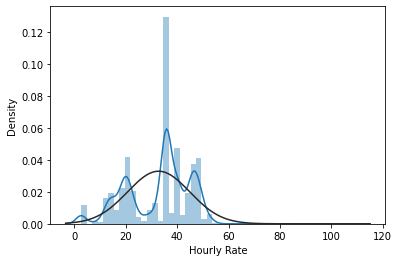

In [79]:
import seaborn as sns
from scipy.stats import norm

sns.distplot(hourly_workers, fit=norm)

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [80]:
# Your code here:
police_workers_ft = salaries[(salaries['Department'] == 'POLICE') & (salaries['Full or Part-Time'] == 'F')]['Annual Salary']
z_score, p_value = ztest(police_workers_ft, value=86000,alternative='larger')
alpha = 0.05
z_score, p_value


(3.081997005712994, 0.0010280845287547855)

In [81]:
p_value < alpha

True

Using the `crosstab` function, find the department that has the most hourly workers. 

In [82]:
# Your code here:
most_hourly_workers = pd.crosstab(salaries['Department'], salaries['Salary or Hourly'])
most_hourly_workers.sort_values('Hourly', ascending=False).head(1)


Salary or Hourly,Hourly,Salary
Department,,
STREETS & SAN,1862,336


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [83]:
# Your code here:
# In order to use 1samp ttest we must import scipy.stats
import scipy.stats as stats

streets_n_san_workers = salaries[salaries['Department'] == 'STREETS & SAN']['Hourly Rate']
streets_n_san_workers = streets_n_san_workers.dropna()

# 1 sample ttest
t_test, p_value = stats.ttest_1samp(a=streets_n_san_workers, popmean=35, alternative='less')
alpha = 0.05
print(t_test, p_value)
print(p_value < alpha)

-9.567447887848152 1.6689265282353859e-21
True


# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [84]:
# Your code here:

# we calculate the confidence label, given as the complement of alpha to reach 100% probability
alpha = 0.05
confidence_level = 1 - alpha

# degrees of freedom (not to confuse with dataframe) is the lenght of sample size - 1
degrees_freedom = hourly_workers.size - 1

# sample mean for the filtered variable
sample_mean = hourly_workers.mean()

# 
sample_standard_error = stats.sem(hourly_workers)


minor_int, major_int = stats.t.interval(confidence_level, degrees_freedom, sample_mean,sample_standard_error)
print(minor_int, major_int)
print(sample_mean)
print(minor_int < sample_mean < major_int)

# resource: https://www.adamsmith.haus/python/answers/how-to-compute-the-confidence-interval-of-a-sample-statistic-in-python

32.52345834488425 33.05365708767623
32.78855771628024
True


In [85]:
hourly_workers.describe()

count    8022.000000
mean       32.788558
std        12.112573
min         2.650000
25%        21.200000
50%        35.600000
75%        40.200000
max       109.000000
Name: Hourly Rate, dtype: float64

In [86]:
# calculating standard error by hand
sigma = 12.112573
n = 8022
error_estandar = sigma / np.sqrt(n)
error_estandar

0.13523686003520868

C:\Users\JoseV\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


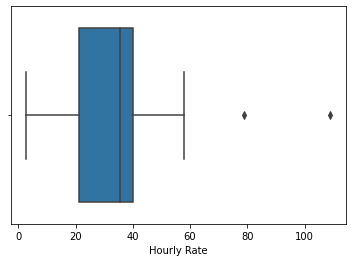

In [87]:
import seaborn as sns
sns.boxplot(hourly_workers);

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [88]:
# Your code here:

# we calculate the confidence label, given as the complement of alpha to reach 100% probability
alpha = 0.05
confidence_level = 1 - alpha

# degrees of freedom (not to confuse with dataframe) is the lenght of sample size - 1
degrees_freedom = police_workers_ft.size - 1

# sample mean for the filtered variable
sample_mean = police_workers_ft.mean()

# 
sample_standard_error = stats.sem(police_workers_ft)


minor_int, major_int = stats.t.interval(confidence_level, degrees_freedom, sample_mean,sample_standard_error)
print(minor_int, major_int)
print(sample_mean)
print(minor_int < sample_mean < major_int)

86177.05631531784 86795.77269094894
86486.41450313339
True


In [89]:
police_workers_ft.describe()

count     13404.000000
mean      86486.414503
std       18272.228294
min       38376.000000
25%       84054.000000
50%       90024.000000
75%       94524.000000
max      260004.000000
Name: Annual Salary, dtype: float64

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [94]:
# Your code here:
from statsmodels.stats.proportion import proportions_ztest

count = hourly_workers.size # total part-time workers
nobs = salaries['Hourly Rate'].size
alpha = 0.05
value = 0.25 # 25% proportion

z_test, p_value = proportions_ztest(count, nobs, value)
print('count = ', count)
print('nobs = ', nobs)
print('value = ', value)
print('z_test = {0}; p_value = {1}'.format(z_test, p_value))
print(p_value < alpha)

count =  8022
nobs =  33183
value =  0.25
z_test = -3.5099964213703005; p_value = 0.0004481127249057967
True
